# LOMMIS Missing Flights Dashboard
## Multi-Month Analysis of Missing Flight Patterns

This notebook provides a comprehensive overview of missing flights across multiple months, including:
- Aggregate statistics across all months
- Month-by-month comparison
- Top missing aircraft analysis
- Performance metrics and percentages

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')
from traffic.core import Traffic

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Configuration - Months to analyze
YEAR = 2025
MONTHS = [1, 2, 3]  # January, February, March
MONTH_NAMES = ['January', 'February', 'March']

print("📅 MULTI-MONTH MISSING FLIGHTS ANALYSIS")
print("="*50)
print(f"Year: {YEAR}")
print(f"Months: {', '.join(MONTH_NAMES)}")
print("="*50)

📅 MULTI-MONTH MISSING FLIGHTS ANALYSIS
Year: 2025
Months: January, February, March


In [3]:
# Function to load comparison results for a given month
def load_month_data(year, month):
    """Load comparison results for a specific month"""
    month_str = f"{month:02d}"
    file_identifier = f"{month_str}{year}"
    
    # File paths
    excel_file = f"Excel/ARP_LSZT_{file_identifier}.xlsx"
    truth_file = f"Excel/ARP_LSZT_{file_identifier}_TRUTH.csv"
    results_file = f"Excel/comparison_results_{file_identifier}.csv"
    
    month_name = ['', 'January', 'February', 'March', 'April', 'May'][month]
    
    try:
        # Load comparison results
        if os.path.exists(results_file):
            results_df = pd.read_csv(results_file)
            
            # Load truth data for total count
            truth_df = pd.read_csv(truth_file) if os.path.exists(truth_file) else None
            
            # Load generated data for total count
            generated_df = None
            if os.path.exists(excel_file):
                generated_df = pd.read_excel(excel_file, sheet_name='DATA')
                # Process generated data
                generated_df.columns = generated_df.iloc[0]
                generated_df = generated_df.drop(generated_df.index[0]).reset_index(drop=True)
            
            print(f"✅ {month_name}: Loaded successfully")
            return {
                'month': month,
                'month_name': month_name,
                'results': results_df,
                'truth': truth_df,
                'generated': generated_df,
                'files_exist': True
            }
        else:
            print(f"❌ {month_name}: Results file not found")
            return {
                'month': month,
                'month_name': month_name,
                'files_exist': False
            }
    except Exception as e:
        print(f"❌ {month_name}: Error loading data - {e}")
        return {
            'month': month,
            'month_name': month_name,
            'files_exist': False,
            'error': str(e)
        }

# Load data for all months
monthly_data = {}
for month in MONTHS:
    monthly_data[month] = load_month_data(YEAR, month)

✅ January: Loaded successfully
✅ February: Loaded successfully
✅ March: Loaded successfully


In [4]:
# Extract missing flights data for each month
missing_data_summary = []
all_missing_flights = pd.DataFrame()

for month in MONTHS:
    data = monthly_data[month]
    
    if data['files_exist']:
        results_df = data['results']
        truth_df = data['truth']
        generated_df = data['generated']
        
        # Calculate statistics
        missing_flights = results_df[results_df['STATUS'] == 'MISSING IN GENERATED']
        total_truth = len(truth_df) if truth_df is not None else 0
        total_generated = len(generated_df) if generated_df is not None else 0
        total_missing = len(missing_flights)
        missing_percentage = (total_missing / total_truth * 100) if total_truth > 0 else 0
        detection_rate = ((total_truth - total_missing) / total_truth * 100) if total_truth > 0 else 0
        
        # Top missing aircraft
        top_missing_aircraft = missing_flights['REGISTRATION'].value_counts().head(3)
        
        summary = {
            'month': month,
            'month_name': data['month_name'],
            'total_truth_flights': total_truth,
            'total_generated_flights': total_generated,
            'total_missing_flights': total_missing,
            'missing_percentage': missing_percentage,
            'detection_rate': detection_rate,
            'top_missing_aircraft': top_missing_aircraft.to_dict() if len(top_missing_aircraft) > 0 else {}
        }
        
        missing_data_summary.append(summary)
        
        # Add month column to missing flights and combine
        if len(missing_flights) > 0:
            missing_flights_copy = missing_flights.copy()
            missing_flights_copy['MONTH_NAME'] = data['month_name']
            missing_flights_copy['MONTH_NUM'] = month
            all_missing_flights = pd.concat([all_missing_flights, missing_flights_copy], ignore_index=True)

# Create summary DataFrame
summary_df = pd.DataFrame(missing_data_summary)

print("\n📊 DATA SUMMARY:")
print(summary_df[['month_name', 'total_truth_flights', 'total_missing_flights', 'missing_percentage', 'detection_rate']].round(1))


📊 DATA SUMMARY:
  month_name  total_truth_flights  total_missing_flights  no_adsb_count  \
0    January                   74                     28             28   
1   February                  127                     31             31   
2      March                  447                    151            143   

   detector_missed_count  detection_rate  adjusted_detection_rate  
0                      0            62.2                    100.0  
1                      0            75.6                    100.0  
2                      8            66.2                     98.2  



📋 SAMPLE OF MISSING FLIGHTS WITH STATUS:

January:
REGISTRATION  DAY  TIME_TRUTH        STATUS
      HB2376   13         930 NO ADS-B DATA
       HBEGO   13        1045 NO ADS-B DATA
       HBEGO   13        1415 NO ADS-B DATA
       HBEGO   16        1040 NO ADS-B DATA
       HBEGO   16        1445 NO ADS-B DATA
       HBCFA   24         756 NO ADS-B DATA
       HBCFA   24         756 NO ADS-B DATA
       HBCFA   24         930 NO ADS-B DATA
       HBCNF   24        1340 NO ADS-B DATA
       HBCNF   24        1400 NO ADS-B DATA
... and 18 more missing flights


February:
REGISTRATION  DAY  TIME_TRUTH        STATUS
       PHJLK    3        1430 NO ADS-B DATA
       HBPHP    4        1255 NO ADS-B DATA
       HBPHP    4        1445 NO ADS-B DATA
       HBEGO    5        1540 NO ADS-B DATA
       HBEGO    5        1605 NO ADS-B DATA
       HBPHU    7         924 NO ADS-B DATA
       HBPHU    7         924 NO ADS-B DATA
       HBPHU    7         945 NO ADS-B DATA
       HBHFW    7       

## Aggregate Analysis Across All Months

In [6]:
# Calculate aggregate statistics
if len(summary_df) > 0:
    total_truth_all = summary_df['total_truth_flights'].sum()
    total_missing_all = summary_df['total_missing_flights'].sum()
    total_generated_all = summary_df['total_generated_flights'].sum()
    overall_missing_rate = (total_missing_all / total_truth_all * 100) if total_truth_all > 0 else 0
    overall_detection_rate = 100 - overall_missing_rate
    
    print("\n" + "="*60)
    print("AGGREGATE STATISTICS ACROSS ALL MONTHS")
    print("="*60)
    print(f"📊 Total Truth Flights: {total_truth_all:,}")
    print(f"📊 Total Generated Flights: {total_generated_all:,}")
    print(f"❌ Total Missing Flights: {total_missing_all:,}")
    print(f"📈 Overall Missing Rate: {overall_missing_rate:.1f}%")
    print(f"✅ Overall Detection Rate: {overall_detection_rate:.1f}%")
    
    # Top missing aircraft across all months
    if len(all_missing_flights) > 0:
        top_missing_overall = all_missing_flights['REGISTRATION'].value_counts().head(5)
        print(f"\n🛩️  TOP 5 MISSING AIRCRAFT (All Months):")
        for i, (aircraft, count) in enumerate(top_missing_overall.items(), 1):
            months_affected = all_missing_flights[all_missing_flights['REGISTRATION'] == aircraft]['MONTH_NAME'].unique()
            print(f"   {i}. {aircraft}: {count} missing flights across {len(months_affected)} month(s) ({', '.join(months_affected)})")
    
    print("="*60)
else:
    print("❌ No data available for analysis")


AGGREGATE STATISTICS ACROSS ALL MONTHS
📊 Total Truth Flights: 648
📊 Total Generated Flights: 452
❌ Total Missing Flights: 210
📈 Overall Missing Rate: 32.4%
✅ Overall Detection Rate: 67.6%

🛩️  TOP 5 MISSING AIRCRAFT (All Months):
   1. HBEGO: 54 missing flights across 3 month(s) (January, February, March)
   2. HBPQS: 17 missing flights across 2 month(s) (February, March)
   3. HBHFW: 15 missing flights across 3 month(s) (January, February, March)
   4. HBPHP: 11 missing flights across 3 month(s) (January, February, March)
   5. PHJLK: 10 missing flights across 3 month(s) (January, February, March)


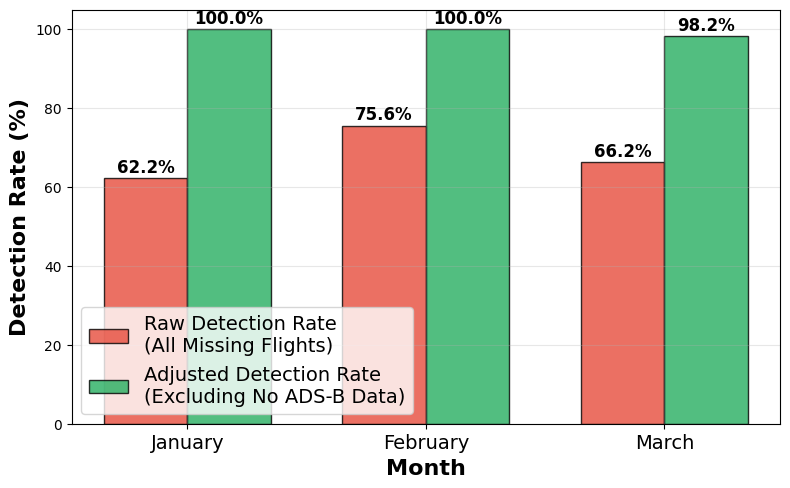

📊 KEY INSIGHTS:
----------------------------------------------------------------------
January: 62.2% → 100.0% (+37.8 ppt improvement)
February: 75.6% → 100.0% (+24.4 ppt improvement)
March: 66.2% → 98.2% (+32.0 ppt improvement)
----------------------------------------------------------------------


In [24]:
# Comparison of Detection Rates: Raw vs Adjusted
if len(summary_df) > 0:
    fig, ax = plt.subplots(figsize=(8, 5))
    
    months = summary_df['month_name']
    x = np.arange(len(months))
    width = 0.35  # Width of bars
    
    # Create side-by-side bars
    bars1 = ax.bar(x - width/2, summary_df['detection_rate'], width, label='Raw Detection Rate\n(All Missing Flights)', 
                   color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=1)
    bars2 = ax.bar(x + width/2, summary_df['adjusted_detection_rate'], width, 
                   label='Adjusted Detection Rate\n(Excluding No ADS-B Data)', 
                   color='#27AE60', alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bars, values in zip([bars1, bars2], [summary_df['detection_rate'], summary_df['adjusted_detection_rate']]):
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Customize the plot
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    ax.set_ylabel('Detection Rate (%)', fontsize=16, fontweight='bold')
    # ax.set_title('Detection Rate Comparison: Raw vs Adjusted\n(Excluding No ADS-B Data Flights)', 
    #             fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(months, fontsize=14)
    ax.set_ylim(0, 105)
    ax.legend(loc='lower left', fontsize=14)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add annotations for missing flights breakdown
    # for i, row in summary_df.iterrows():
    #     ax.annotate(f'Missing: {int(row["total_missing_flights"])}',
    #                xy=(i, row['detection_rate']), xytext=(i, row['detection_rate'] - 5),
    #                ha='center', fontsize=9, style='italic',
    #                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))
    #     ax.annotate(f'No ADS-B: {int(row["no_adsb_count"])}, Detector Missed: {int(row["detector_missed_count"])}',
    #                xy=(i, row['adjusted_detection_rate']), xytext=(i, row['adjusted_detection_rate'] + 3),
    #                ha='center', fontsize=8, style='italic', color='darkgreen',
    #                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.3))
    
    plt.tight_layout()
    plt.show()
    
    print("📊 KEY INSIGHTS:")
    print("-" * 70)
    for _, row in summary_df.iterrows():
        improvement = row['adjusted_detection_rate'] - row['detection_rate']
        print(f"{row['month_name']}: {row['detection_rate']:.1f}% → {row['adjusted_detection_rate']:.1f}% ({improvement:+.1f} ppt improvement)")
    print("-" * 70)

else:
    print("❌ No data available for visualization")


## Comprehensive Visualization Dashboard

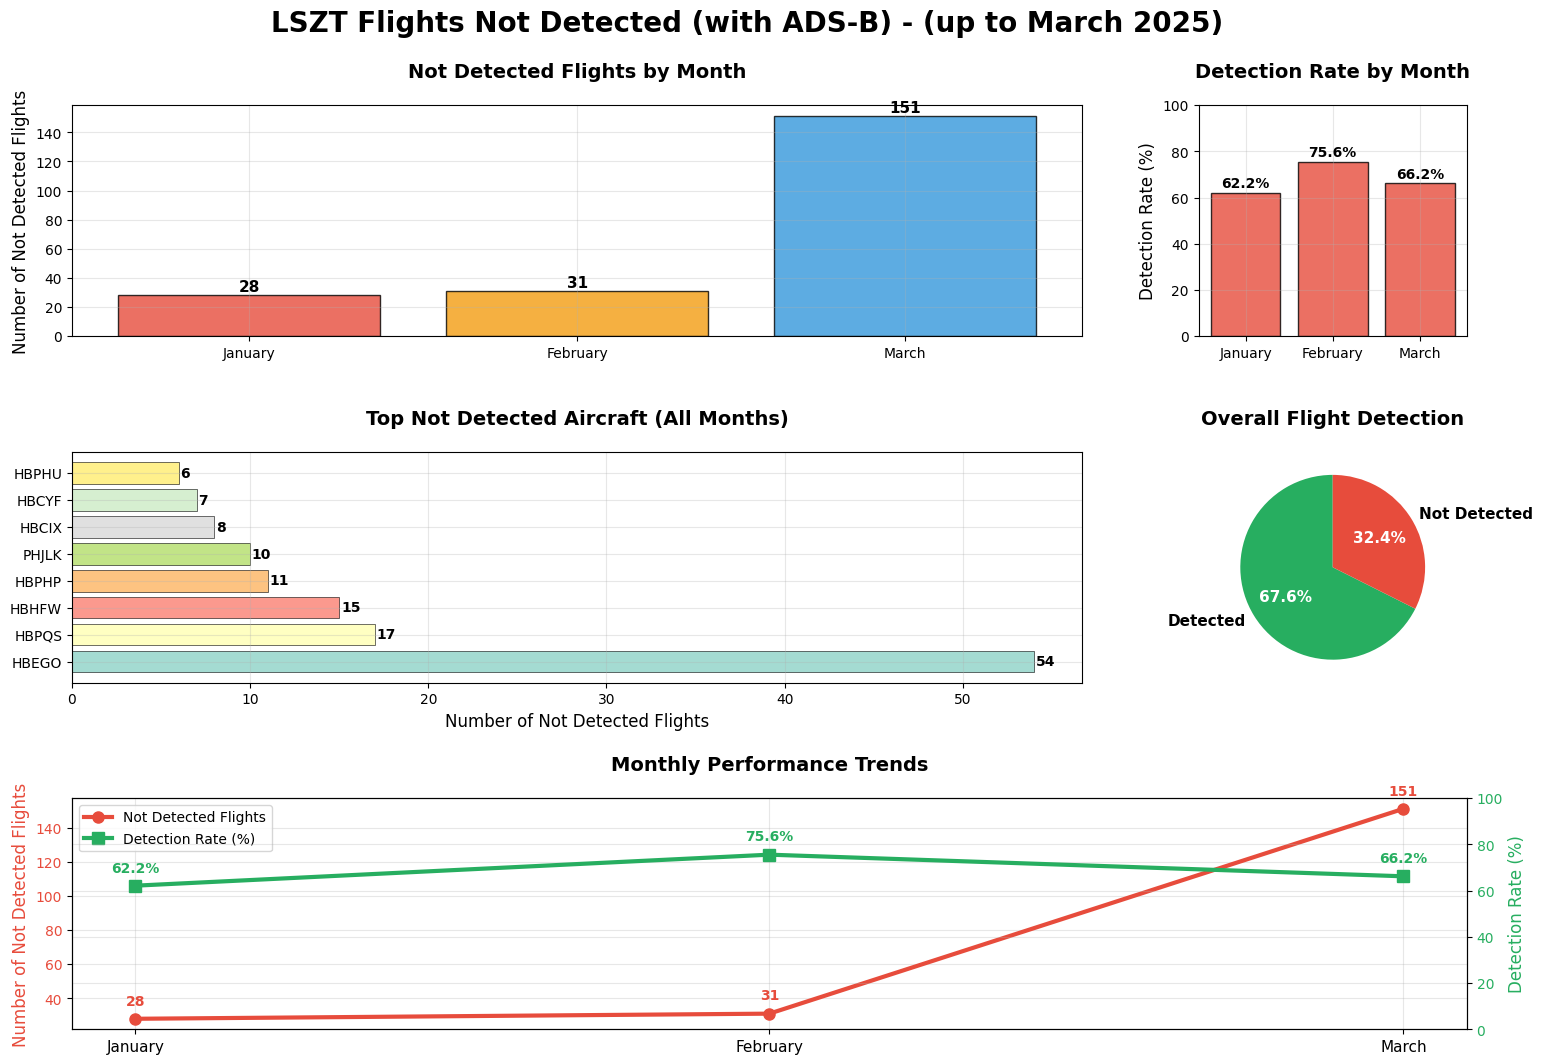

In [25]:
# Create comprehensive dashboard
if len(summary_df) > 0:
    # Set up the plotting style
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.5, wspace=0.3, width_ratios=[2, 2, 1.2])
    
    # Main title
    fig.suptitle(f'LSZT Flights Not Detected (with ADS-B) - (up to March {YEAR})', fontsize=20, fontweight='bold', y=0.96)
    
    # 1. Monthly Missing Flights Bar Chart (Top Left - spans 2 columns)
    ax1 = fig.add_subplot(gs[0, :2])
    months = summary_df['month_name']
    missing_counts = summary_df['total_missing_flights']
    colors = ['#E74C3C', '#F39C12', '#3498DB']
    
    bars = ax1.bar(months, missing_counts, color=colors[:len(months)], alpha=0.8, edgecolor='black', linewidth=1)
    ax1.set_title('Not Detected Flights by Month', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('Number of Not Detected Flights', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, missing_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(value)}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 2. Detection Rate by Month (Top Right)
    ax2 = fig.add_subplot(gs[0, 2])
    detection_rates = summary_df['detection_rate']
    colors_detection = ['#27AE60' if rate >= 90 else '#F39C12' if rate >= 80 else '#E74C3C' for rate in detection_rates]
    
    bars2 = ax2.bar(months, detection_rates, color=colors_detection, alpha=0.8, edgecolor='black', linewidth=1)
    ax2.set_title('Detection Rate by Month', fontsize=14, fontweight='bold', pad=20)
    ax2.set_ylabel('Detection Rate (%)', fontsize=12)
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for bar, value in zip(bars2, detection_rates):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # 3. Top Missing Aircraft Across All Months (Middle Left)
    ax3 = fig.add_subplot(gs[1, :2])
    if len(all_missing_flights) > 0:
        top_aircraft = all_missing_flights['REGISTRATION'].value_counts().head(8)
        colors_aircraft = plt.cm.Set3(np.linspace(0, 1, len(top_aircraft)))
        
        bars3 = ax3.barh(range(len(top_aircraft)), top_aircraft.values, 
                        color=colors_aircraft, alpha=0.8, edgecolor='black', linewidth=0.5)
        ax3.set_yticks(range(len(top_aircraft)))
        ax3.set_yticklabels(top_aircraft.index, fontsize=10)
        ax3.set_title('Top Not Detected Aircraft (All Months)', fontsize=14, fontweight='bold', pad=20)
        ax3.set_xlabel('Number of Not Detected Flights', fontsize=12)
        ax3.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, value) in enumerate(zip(bars3, top_aircraft.values)):
            width = bar.get_width()
            ax3.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                    f'{int(value)}', ha='left', va='center', fontweight='bold', fontsize=10)
    
    # 4. Overall Statistics Pie Chart (Middle Right)
    ax4 = fig.add_subplot(gs[1, 2])
    detected_flights = total_truth_all - total_missing_all
    pie_data = [detected_flights, total_missing_all]
    pie_labels = ['Detected', 'Not Detected']
    pie_colors = ['#27AE60', '#E74C3C']
    
    wedges, texts, autotexts = ax4.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                      startangle=90, colors=pie_colors, 
                                      textprops={'fontsize': 11, 'fontweight': 'bold'})
    ax4.set_title('Overall Flight Detection', fontsize=14, fontweight='bold', pad=20)
    
    # Style pie chart text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    # 5. Monthly Trends Line Chart (Bottom - spans all columns)
    ax5 = fig.add_subplot(gs[2, :])
    
    # Create x-axis positions
    x_pos = np.arange(len(months))
    
    # Plot multiple metrics
    ax5_twin = ax5.twinx()
    
    # Missing flights (left y-axis)
    line1 = ax5.plot(x_pos, summary_df['total_missing_flights'], 'o-', 
                     color='#E74C3C', linewidth=3, markersize=8, label='Not Detected Flights')
    ax5.set_ylabel('Number of Not Detected Flights', fontsize=12, color='#E74C3C')
    ax5.tick_params(axis='y', labelcolor='#E74C3C')
    
    # Detection rate (right y-axis)
    line2 = ax5_twin.plot(x_pos, summary_df['detection_rate'], 's-', 
                         color='#27AE60', linewidth=3, markersize=8, label='Detection Rate (%)')
    ax5_twin.set_ylabel('Detection Rate (%)', fontsize=12, color='#27AE60')
    ax5_twin.tick_params(axis='y', labelcolor='#27AE60')
    ax5_twin.set_ylim(0, 100)
    
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(months, fontsize=11)
    ax5.set_title('Monthly Performance Trends', fontsize=14, fontweight='bold', pad=20)
    ax5.grid(True, alpha=0.3)
    
    # Add legend
    lines1, labels1 = ax5.get_legend_handles_labels()
    lines2, labels2 = ax5_twin.get_legend_handles_labels()
    ax5.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)
    
    # Add value annotations
    for i, (missing, detection) in enumerate(zip(summary_df['total_missing_flights'], summary_df['detection_rate'])):
        ax5.annotate(f'{int(missing)}', (i, missing), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color='#E74C3C')
        ax5_twin.annotate(f'{detection:.1f}%', (i, detection), textcoords="offset points", 
                         xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color='#27AE60')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No data available for visualization")

## Month-by-Month Detailed Analysis

## Aggregated Time Difference Analysis (All Months)

In [9]:
# Aggregated Time Difference Analysis Across All Three Months
print("="*80)
print("AGGREGATED TIME DIFFERENCE ANALYSIS (ALL MONTHS)")
print("="*80)

# Function to convert time string to minutes since midnight
def time_to_minutes(time_str):
    """Convert time string (HHMM) to minutes since midnight"""
    if pd.isna(time_str) or str(time_str) == 'NOT FOUND':
        return None
    try:
        time_str = str(time_str).zfill(4)
        hours = int(time_str[:2])
        minutes = int(time_str[2:])
        return hours * 60 + minutes
    except:
        return None

# Function to calculate time difference in minutes
def calculate_time_diff(truth_time, generated_time):
    """Calculate time difference in minutes (generated - truth)"""
    truth_min = time_to_minutes(truth_time)
    gen_min = time_to_minutes(generated_time)
    
    if truth_min is None or gen_min is None:
        return None
    
    diff = gen_min - truth_min
    
    # Handle day boundary crossings (e.g., 23:59 to 00:05)
    if diff > 12 * 60:  # More than 12 hours positive
        diff -= 24 * 60
    elif diff < -12 * 60:  # More than 12 hours negative
        diff += 24 * 60
    
    return diff

# Collect time analysis data from all months
all_time_analysis_data = []
monthly_time_stats = []

for month in MONTHS:
    data = monthly_data[month]
    
    if data['files_exist']:
        results_df = data['results']
        month_name = data['month_name']
        
        # Get flights with valid times for this month
        matches_with_times = results_df[
            (results_df['TIME_TRUTH'] != 'NOT FOUND') & 
            (results_df['TIME_GENERATED'] != 'NOT FOUND')
        ].copy()
        
        print(f"📅 {month_name}: Analyzing {len(matches_with_times)} flights with valid times...")
        
        month_time_data = []
        for idx, row in matches_with_times.iterrows():
            truth_time = row['TIME_TRUTH']
            generated_time = row['TIME_GENERATED']
            time_diff = calculate_time_diff(truth_time, generated_time)
            
            if time_diff is not None:
                flight_data = {
                    'MONTH': month,
                    'MONTH_NAME': month_name,
                    'REGISTRATION': row['REGISTRATION'],
                    'DAY': row['DAY'],
                    'TIME_TRUTH': truth_time,
                    'TIME_GENERATED': generated_time,
                    'TIME_DIFF_MINUTES': time_diff,
                    'TIME_DIFF_HOURS': round(time_diff / 60, 2),
                    'STATUS': row['STATUS'],
                    'ROUTE_TRUTH': row['ROUTE_TRUTH'],
                    'TYPE_TRUTH': row['TYPE_TRUTH']
                }
                all_time_analysis_data.append(flight_data)
                month_time_data.append(time_diff)
        
        # Calculate monthly statistics
        if month_time_data:
            monthly_stats = {
                'month': month,
                'month_name': month_name,
                'count': len(month_time_data),
                'mean': np.mean(month_time_data),
                'median': np.median(month_time_data),
                'std': np.std(month_time_data),
                'min': np.min(month_time_data),
                'max': np.max(month_time_data)
            }
            monthly_time_stats.append(monthly_stats)

# Create comprehensive time analysis DataFrame
all_time_analysis_df = pd.DataFrame(all_time_analysis_data)
monthly_stats_df = pd.DataFrame(monthly_time_stats)

if len(all_time_analysis_df) > 0:
    print(f"\n🔍 OVERALL AGGREGATED STATISTICS:")
    print(f"Total flights analyzed across all months: {len(all_time_analysis_df)}")
    print(f"Mean time difference: {all_time_analysis_df['TIME_DIFF_MINUTES'].mean():.1f} minutes")
    print(f"Median time difference: {all_time_analysis_df['TIME_DIFF_MINUTES'].median():.1f} minutes")
    print(f"Standard deviation: {all_time_analysis_df['TIME_DIFF_MINUTES'].std():.1f} minutes")
    print(f"Min difference: {all_time_analysis_df['TIME_DIFF_MINUTES'].min():.1f} minutes")
    print(f"Max difference: {all_time_analysis_df['TIME_DIFF_MINUTES'].max():.1f} minutes")
    
    # Monthly comparison
    if len(monthly_stats_df) > 0:
        print(f"\n📊 MONTHLY COMPARISON:")
        print("Month        | Count | Mean(min) | Median(min) | Std(min) | Min(min) | Max(min)")
        print("-" * 75)
        for _, row in monthly_stats_df.iterrows():
            print(f"{row['month_name']:12s} | {row['count']:5d} | {row['mean']:9.1f} | {row['median']:11.1f} | {row['std']:8.1f} | {row['min']:8.1f} | {row['max']:8.1f}")
    
    # Categorize time differences
    exact_matches = all_time_analysis_df[all_time_analysis_df['TIME_DIFF_MINUTES'] == 0]
    small_diff = all_time_analysis_df[abs(all_time_analysis_df['TIME_DIFF_MINUTES']) <= 5]
    medium_diff = all_time_analysis_df[(abs(all_time_analysis_df['TIME_DIFF_MINUTES']) > 5) & 
                                       (abs(all_time_analysis_df['TIME_DIFF_MINUTES']) <= 30)]
    large_diff = all_time_analysis_df[abs(all_time_analysis_df['TIME_DIFF_MINUTES']) > 30]
    
    print(f"\n⏰ TIME DIFFERENCE CATEGORIES (ALL MONTHS):")
    print(f"Exact matches (0 min): {len(exact_matches)} ({len(exact_matches)/len(all_time_analysis_df)*100:.1f}%)")
    print(f"Small differences (≤5 min): {len(small_diff)} ({len(small_diff)/len(all_time_analysis_df)*100:.1f}%)")
    print(f"Medium differences (5-30 min): {len(medium_diff)} ({len(medium_diff)/len(all_time_analysis_df)*100:.1f}%)")
    print(f"Large differences (>30 min): {len(large_diff)} ({len(large_diff)/len(all_time_analysis_df)*100:.1f}%)")
    
    # Show flights with largest time differences across all months
    if len(large_diff) > 0:
        print(f"\n🚨 WORST TIME DIFFERENCES ACROSS ALL MONTHS (>30 minutes):")
        large_diff_sorted = large_diff.sort_values('TIME_DIFF_MINUTES', key=abs, ascending=False)
        print("Month     | Aircraft | Day | Truth | Generated | Difference | Route     | Type")
        print("-" * 80)
        for idx, row in large_diff_sorted.head(15).iterrows():
            sign = "+" if row['TIME_DIFF_MINUTES'] > 0 else ""
            print(f"{str(row['MONTH_NAME'])[:3]:9s} | {str(row['REGISTRATION']):8s} | {row['DAY']:3.0f} | {str(row['TIME_TRUTH']):5s} | {str(row['TIME_GENERATED']):9s} | {sign}{row['TIME_DIFF_MINUTES']:6.0f} min | {str(row['ROUTE_TRUTH'])[:9]:9s} | {str(row['TYPE_TRUTH'])}")
    
    # Analyze patterns by flight type across all months
    print(f"\n✈️  TIME DIFFERENCES BY MOVEMENT TYPE (ALL MONTHS):")
    for movement_type in all_time_analysis_df['TYPE_TRUTH'].unique():
        type_data = all_time_analysis_df[all_time_analysis_df['TYPE_TRUTH'] == movement_type]
        if len(type_data) > 0:
            mean_diff = type_data['TIME_DIFF_MINUTES'].mean()
            std_diff = type_data['TIME_DIFF_MINUTES'].std()
            print(f"  {movement_type}: Mean={mean_diff:.1f}min, Std={std_diff:.1f}min, Count={len(type_data)}")
    
    # Analyze patterns by route across all months
    print(f"\n🛣️  TIME DIFFERENCES BY ROUTE (ALL MONTHS):")
    route_stats = all_time_analysis_df.groupby('ROUTE_TRUTH').agg({
        'TIME_DIFF_MINUTES': ['mean', 'std', 'count']
    }).round(1)
    route_stats.columns = ['Mean_Diff', 'Std_Diff', 'Count']
    route_stats = route_stats.sort_values('Count', ascending=False)
    print(route_stats.head(10))
    
    # Monthly performance comparison
    print(f"\n📈 MONTHLY PERFORMANCE TRENDS:")
    for idx, row in monthly_stats_df.iterrows():
        performance = "🟢 Excellent" if abs(row['mean']) <= 10 else "🟡 Good" if abs(row['mean']) <= 30 else "🟠 Fair" if abs(row['mean']) <= 60 else "🔴 Poor"
        print(f"   {row['month_name']}: {row['mean']:+.1f} min average bias - {performance}")
    
else:
    print("❌ No valid time comparisons found for analysis across all months")

print("="*80)

AGGREGATED TIME DIFFERENCE ANALYSIS (ALL MONTHS)
📅 January: Analyzing 46 flights with valid times...
📅 February: Analyzing 96 flights with valid times...
📅 March: Analyzing 296 flights with valid times...

🔍 OVERALL AGGREGATED STATISTICS:
Total flights analyzed across all months: 438
Mean time difference: -34.8 minutes
Median time difference: -2.0 minutes
Standard deviation: 98.2 minutes
Min difference: -442.0 minutes
Max difference: 385.0 minutes

📊 MONTHLY COMPARISON:
Month        | Count | Mean(min) | Median(min) | Std(min) | Min(min) | Max(min)
---------------------------------------------------------------------------
January      |    46 |     -23.5 |        -1.0 |     77.1 |   -288.0 |    155.0
February     |    96 |     -24.2 |        -3.0 |     70.7 |   -329.0 |    226.0
March        |   296 |     -39.9 |        -2.0 |    107.7 |   -442.0 |    385.0

⏰ TIME DIFFERENCE CATEGORIES (ALL MONTHS):
Exact matches (0 min): 24 (5.5%)
Small differences (≤5 min): 150 (34.2%)
Medium diffe

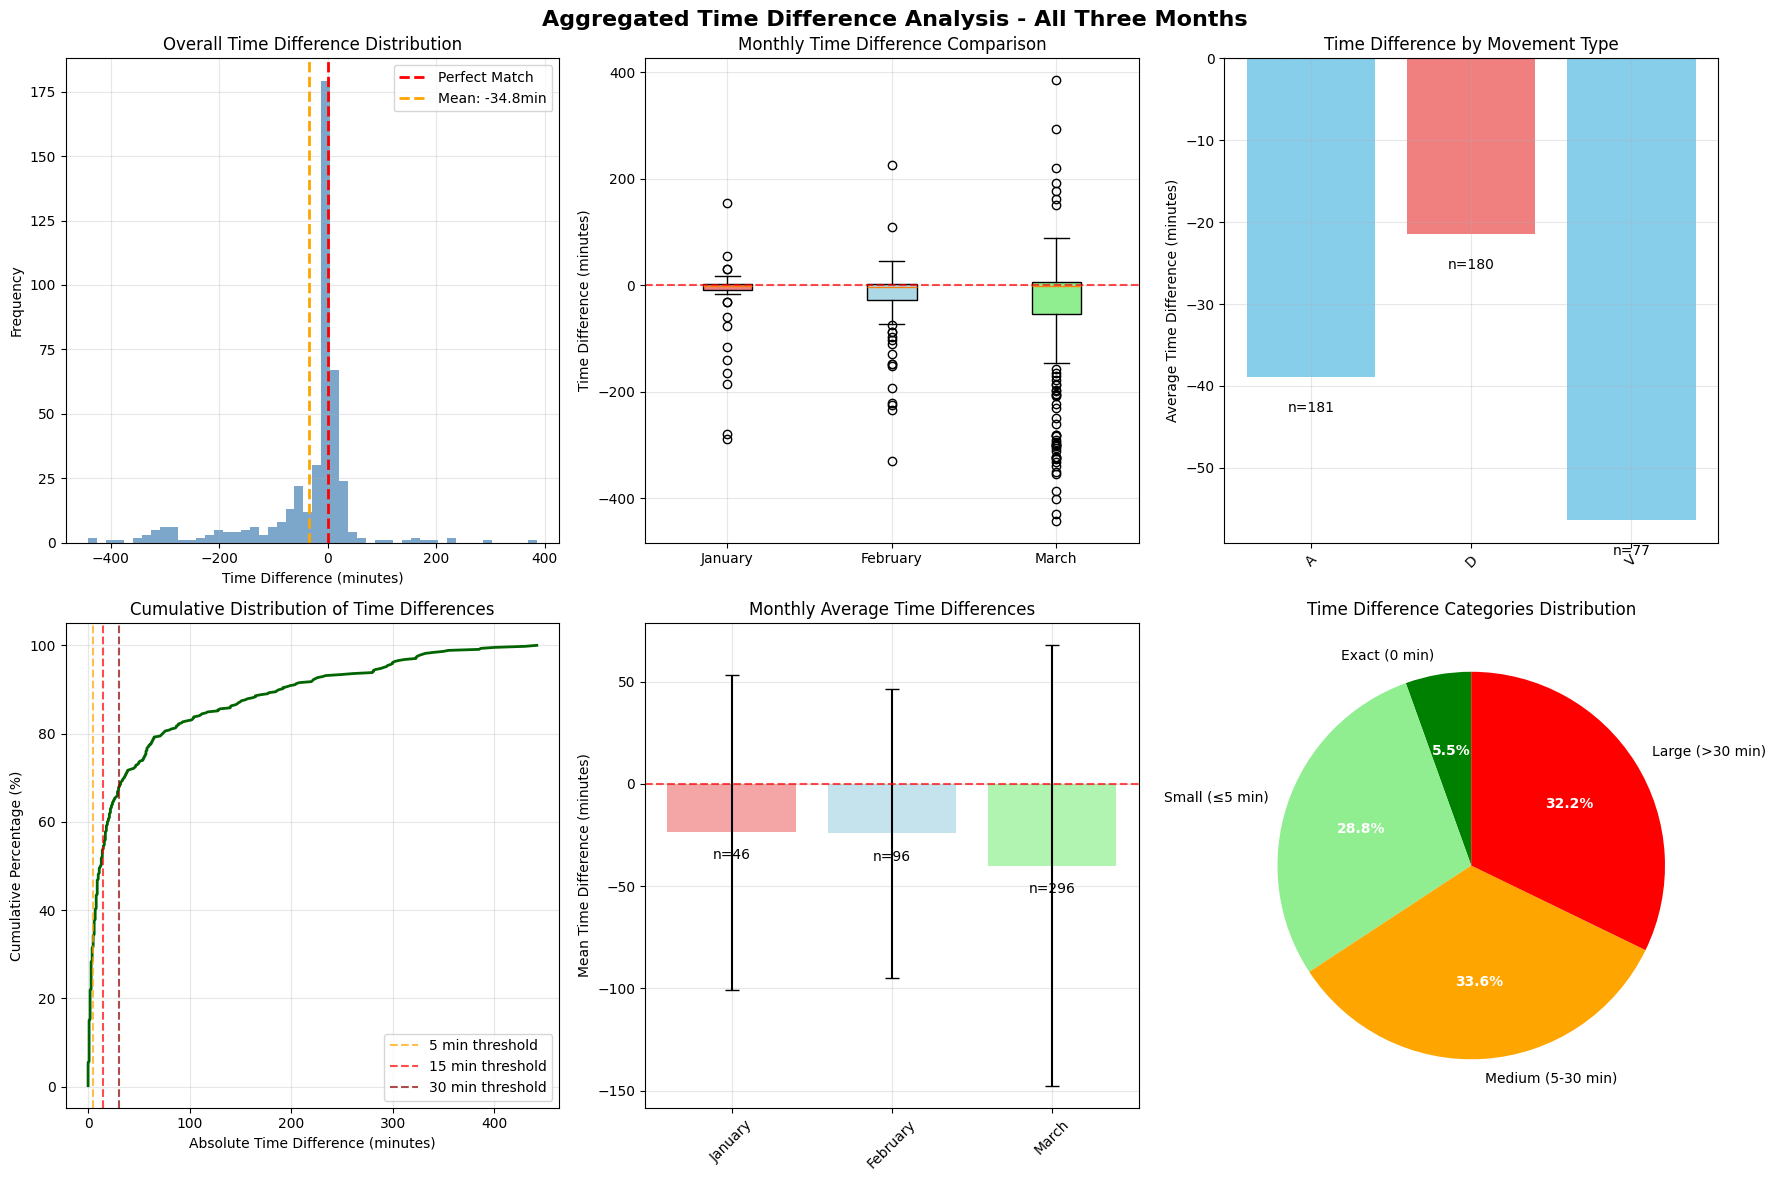


📊 DETAILED STATISTICAL ANALYSIS:
   25th percentile: -41.0 minutes
   75th percentile: 4.0 minutes
   Interquartile range: 45.0 minutes

🔍 PATTERN ANALYSIS:
Aircraft with potential systematic timing bias (2 aircraft):
Registration | Flights | Mean Diff | Bias Type
--------------------------------------------------
HBKLA        |      50 |     -30.8 | Early
DMDUE        |      14 |     -13.0 | Early

✅ Aggregated time difference analysis completed successfully!


In [10]:
# Create comprehensive visualizations for aggregated time analysis
if len(all_time_analysis_df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Aggregated Time Difference Analysis - All Three Months', fontsize=16, fontweight='bold')
    
    # 1. Overall time difference distribution
    ax1 = axes[0, 0]
    all_time_analysis_df['TIME_DIFF_MINUTES'].hist(bins=50, alpha=0.7, color='steelblue', ax=ax1)
    ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='Perfect Match')
    ax1.axvline(all_time_analysis_df['TIME_DIFF_MINUTES'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {all_time_analysis_df["TIME_DIFF_MINUTES"].mean():.1f}min')
    ax1.set_xlabel('Time Difference (minutes)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Overall Time Difference Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Monthly comparison boxplot
    ax2 = axes[0, 1]
    monthly_data_for_plot = [all_time_analysis_df[all_time_analysis_df['MONTH'] == month]['TIME_DIFF_MINUTES'].values 
                            for month in MONTHS if month in all_time_analysis_df['MONTH'].unique()]
    month_labels = [all_time_analysis_df[all_time_analysis_df['MONTH'] == month]['MONTH_NAME'].iloc[0] 
                   for month in MONTHS if month in all_time_analysis_df['MONTH'].unique()]
    
    if monthly_data_for_plot:
        bp = ax2.boxplot(monthly_data_for_plot, labels=month_labels, patch_artist=True)
        colors = ['lightcoral', 'lightblue', 'lightgreen']
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
        ax2.axhline(0, color='red', linestyle='--', alpha=0.7)
        ax2.set_ylabel('Time Difference (minutes)')
        ax2.set_title('Monthly Time Difference Comparison')
        ax2.grid(True, alpha=0.3)
    
    # 3. Time difference by movement type
    ax3 = axes[0, 2]
    type_means = all_time_analysis_df.groupby('TYPE_TRUTH')['TIME_DIFF_MINUTES'].mean()
    type_counts = all_time_analysis_df.groupby('TYPE_TRUTH').size()
    
    bars = ax3.bar(range(len(type_means)), type_means.values, 
                   color=['skyblue', 'lightcoral'][:len(type_means)])
    ax3.set_xticks(range(len(type_means)))
    ax3.set_xticklabels(type_means.index, rotation=45)
    ax3.axhline(0, color='red', linestyle='--', alpha=0.7)
    ax3.set_ylabel('Average Time Difference (minutes)')
    ax3.set_title('Time Difference by Movement Type')
    ax3.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for i, (bar, count) in enumerate(zip(bars, type_counts.values)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -3),
                f'n={count}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)
    
    # 4. Cumulative distribution of absolute time differences
    ax4 = axes[1, 0]
    abs_diffs = abs(all_time_analysis_df['TIME_DIFF_MINUTES']).sort_values()
    cumulative_pct = np.arange(1, len(abs_diffs) + 1) / len(abs_diffs) * 100
    
    ax4.plot(abs_diffs, cumulative_pct, color='darkgreen', linewidth=2)
    ax4.axvline(5, color='orange', linestyle='--', alpha=0.7, label='5 min threshold')
    ax4.axvline(15, color='red', linestyle='--', alpha=0.7, label='15 min threshold')
    ax4.axvline(30, color='darkred', linestyle='--', alpha=0.7, label='30 min threshold')
    ax4.set_xlabel('Absolute Time Difference (minutes)')
    ax4.set_ylabel('Cumulative Percentage (%)')
    ax4.set_title('Cumulative Distribution of Time Differences')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Monthly trends
    ax5 = axes[1, 1]
    if len(monthly_stats_df) > 0:
        x_pos = range(len(monthly_stats_df))
        bars = ax5.bar(x_pos, monthly_stats_df['mean'], 
                      yerr=monthly_stats_df['std'], 
                      capsize=5, alpha=0.7, color=['lightcoral', 'lightblue', 'lightgreen'][:len(monthly_stats_df)])
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(monthly_stats_df['month_name'], rotation=45)
        ax5.axhline(0, color='red', linestyle='--', alpha=0.7)
        ax5.set_ylabel('Mean Time Difference (minutes)')
        ax5.set_title('Monthly Average Time Differences')
        ax5.grid(True, alpha=0.3)
        
        # Add count labels
        for i, (bar, count) in enumerate(zip(bars, monthly_stats_df['count'])):
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + (2 if height >= 0 else -8),
                    f'n={count}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)
    
    # 6. Time difference categories pie chart
    ax6 = axes[1, 2]
    categories = ['Exact (0 min)', 'Small (≤5 min)', 'Medium (5-30 min)', 'Large (>30 min)']
    sizes = [
        len(exact_matches),
        len(small_diff) - len(exact_matches),
        len(medium_diff),
        len(large_diff)
    ]
    colors = ['green', 'lightgreen', 'orange', 'red']
    
    wedges, texts, autotexts = ax6.pie(sizes, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
    ax6.set_title('Time Difference Categories Distribution')
    
    # Make percentage text more readable
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional detailed analysis
    print(f"\n📊 DETAILED STATISTICAL ANALYSIS:")
    print(f"   25th percentile: {all_time_analysis_df['TIME_DIFF_MINUTES'].quantile(0.25):.1f} minutes")
    print(f"   75th percentile: {all_time_analysis_df['TIME_DIFF_MINUTES'].quantile(0.75):.1f} minutes")
    print(f"   Interquartile range: {all_time_analysis_df['TIME_DIFF_MINUTES'].quantile(0.75) - all_time_analysis_df['TIME_DIFF_MINUTES'].quantile(0.25):.1f} minutes")
    
    # Systematic vs Random patterns
    print(f"\n🔍 PATTERN ANALYSIS:")
    systematic_threshold = 0.7  # If more than 70% of an aircraft's flights have the same sign, consider it systematic
    
    aircraft_patterns = all_time_analysis_df.groupby('REGISTRATION').agg({
        'TIME_DIFF_MINUTES': ['count', 'mean', 'std', lambda x: (x > 0).sum() / len(x)]
    }).round(2)
    aircraft_patterns.columns = ['Flight_Count', 'Mean_Diff', 'Std_Diff', 'Positive_Ratio']
    
    # Aircraft with potential systematic bias
    systematic_aircraft = aircraft_patterns[
        (aircraft_patterns['Flight_Count'] >= 3) & 
        ((aircraft_patterns['Positive_Ratio'] >= systematic_threshold) | 
         (aircraft_patterns['Positive_Ratio'] <= (1 - systematic_threshold)))
    ].sort_values('Flight_Count', ascending=False)
    
    if len(systematic_aircraft) > 0:
        print(f"Aircraft with potential systematic timing bias ({len(systematic_aircraft)} aircraft):")
        print("Registration | Flights | Mean Diff | Bias Type")
        print("-" * 50)
        for reg, row in systematic_aircraft.head(10).iterrows():
            bias_type = "Late" if row['Positive_Ratio'] >= systematic_threshold else "Early"
            print(f"{reg:12s} | {row['Flight_Count']:7.0f} | {row['Mean_Diff']:9.1f} | {bias_type}")
    
    print(f"\n✅ Aggregated time difference analysis completed successfully!")

else:
    print("❌ No time difference data available for visualization")

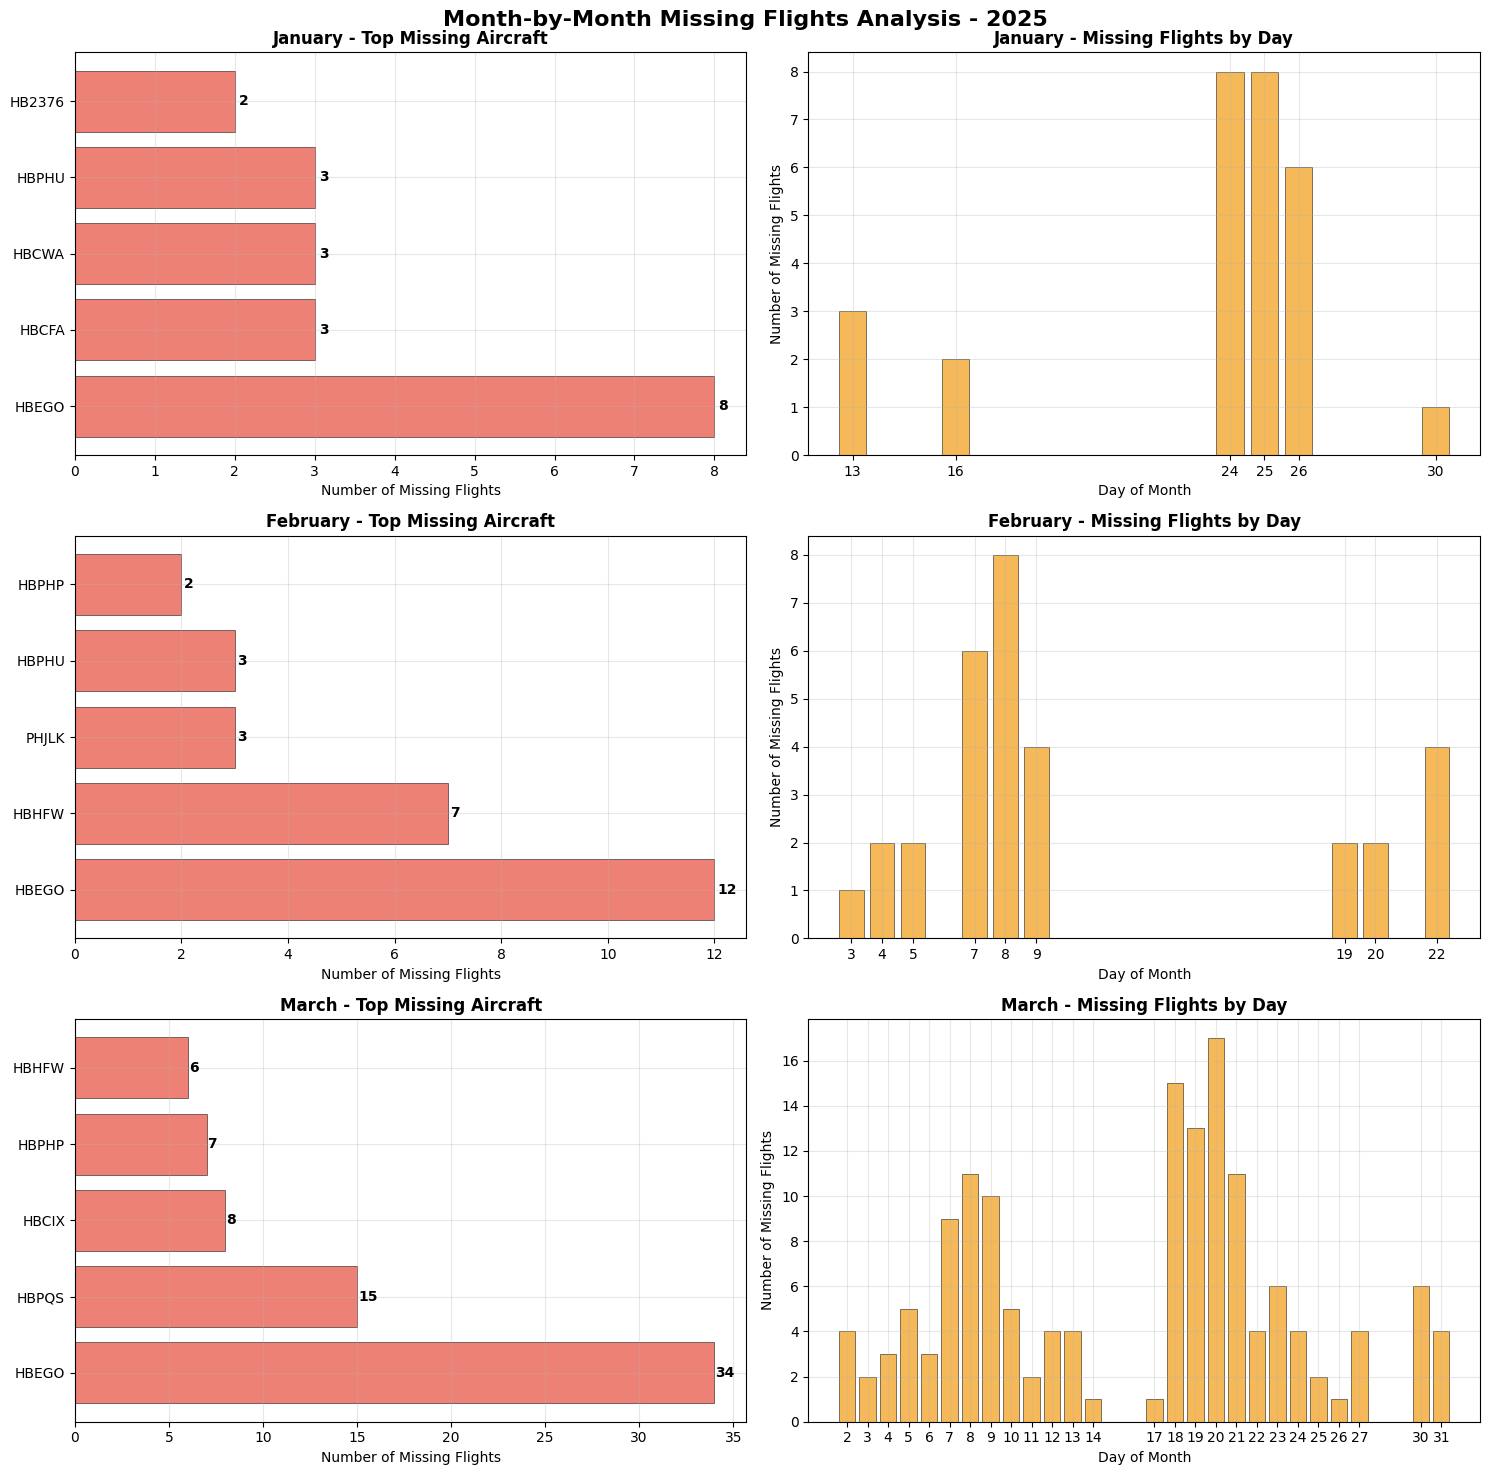

In [11]:
# Individual month analysis
if len(summary_df) > 0:
    fig, axes = plt.subplots(len(MONTHS), 2, figsize=(15, 5*len(MONTHS)))
    fig.suptitle(f'Month-by-Month Missing Flights Analysis - {YEAR}', fontsize=16, fontweight='bold')
    
    if len(MONTHS) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, month in enumerate(MONTHS):
        month_data = monthly_data[month]
        if month_data['files_exist']:
            month_missing = all_missing_flights[all_missing_flights['MONTH_NUM'] == month]
            
            # Left plot: Top missing aircraft for this month
            if len(month_missing) > 0:
                top_aircraft_month = month_missing['REGISTRATION'].value_counts().head(5)
                
                if len(top_aircraft_month) > 0:
                    axes[idx, 0].barh(range(len(top_aircraft_month)), top_aircraft_month.values, 
                                     color='#E74C3C', alpha=0.7, edgecolor='black', linewidth=0.5)
                    axes[idx, 0].set_yticks(range(len(top_aircraft_month)))
                    axes[idx, 0].set_yticklabels(top_aircraft_month.index, fontsize=10)
                    axes[idx, 0].set_title(f'{month_data["month_name"]} - Top Missing Aircraft', fontweight='bold')
                    axes[idx, 0].set_xlabel('Number of Missing Flights')
                    axes[idx, 0].grid(True, alpha=0.3, axis='x')
                    
                    # Add value labels
                    for i, v in enumerate(top_aircraft_month.values):
                        axes[idx, 0].text(v + 0.05, i, str(v), va='center', fontweight='bold')
                else:
                    axes[idx, 0].text(0.5, 0.5, 'No missing flights', ha='center', va='center', 
                                     transform=axes[idx, 0].transAxes, fontsize=14)
                
                # Right plot: Missing flights by day for this month
                day_counts = month_missing['DAY'].value_counts().sort_index()
                if len(day_counts) > 0:
                    axes[idx, 1].bar(day_counts.index, day_counts.values, 
                                   color='#F39C12', alpha=0.7, edgecolor='black', linewidth=0.5)
                    axes[idx, 1].set_title(f'{month_data["month_name"]} - Missing Flights by Day', fontweight='bold')
                    axes[idx, 1].set_xlabel('Day of Month')
                    axes[idx, 1].set_ylabel('Number of Missing Flights')
                    axes[idx, 1].grid(True, alpha=0.3, axis='y')
                    
                    # Force integer x-axis labels
                    axes[idx, 1].set_xticks(day_counts.index)
                    axes[idx, 1].set_xticklabels([int(day) for day in day_counts.index])
                else:
                    axes[idx, 1].text(0.5, 0.5, 'No missing flights', ha='center', va='center', 
                                     transform=axes[idx, 1].transAxes, fontsize=14)
            else:
                # No missing flights for this month
                for col in [0, 1]:
                    axes[idx, col].text(0.5, 0.5, 'No missing flights', ha='center', va='center', 
                                       transform=axes[idx, col].transAxes, fontsize=14, color='green')
                    if col == 0:
                        axes[idx, col].set_title(f'{month_data["month_name"]} - Top Missing Aircraft', fontweight='bold')
                    else:
                        axes[idx, col].set_title(f'{month_data["month_name"]} - Missing Flights by Day', fontweight='bold')
        else:
            # No data available for this month
            for col in [0, 1]:
                axes[idx, col].text(0.5, 0.5, 'Data not available', ha='center', va='center', 
                                   transform=axes[idx, col].transAxes, fontsize=14, color='red')
                axes[idx, col].set_title(f'{month_data["month_name"]} - No Data', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No data available for month-by-month analysis")

## Summary Report

In [12]:
# Generate comprehensive summary report
if len(summary_df) > 0:
    print("\n" + "═"*80)
    print("COMPREHENSIVE MISSING FLIGHTS SUMMARY REPORT")
    print("═"*80)
    
    # Overall performance
    print(f"\n📅 ANALYSIS PERIOD: {', '.join(MONTH_NAMES)} {YEAR}")
    print(f"📊 TOTAL FLIGHTS ANALYZED: {total_truth_all:,}")
    print(f"✅ SUCCESSFULLY DETECTED: {total_truth_all - total_missing_all:,} ({overall_detection_rate:.1f}%)")
    print(f"❌ MISSING FLIGHTS: {total_missing_all:,} ({overall_missing_rate:.1f}%)")
    
    # Month-by-month breakdown
    print(f"\n📈 MONTH-BY-MONTH PERFORMANCE:")
    for _, row in summary_df.iterrows():
        status = "🟢 Excellent" if row['detection_rate'] >= 95 else "🟡 Good" if row['detection_rate'] >= 90 else "🟠 Fair" if row['detection_rate'] >= 80 else "🔴 Poor"
        print(f"   {row['month_name']}: {row['detection_rate']:.1f}% detection rate ({row['total_missing_flights']} missing) - {status}")
    
    # Best and worst performing months
    best_month = summary_df.loc[summary_df['detection_rate'].idxmax()]
    worst_month = summary_df.loc[summary_df['detection_rate'].idxmin()]
    
    print(f"\n🏆 BEST PERFORMING MONTH: {best_month['month_name']} ({best_month['detection_rate']:.1f}% detection rate)")
    print(f"⚠️  WORST PERFORMING MONTH: {worst_month['month_name']} ({worst_month['detection_rate']:.1f}% detection rate)")
    
    # Most problematic aircraft
    if len(all_missing_flights) > 0:
        most_problematic = all_missing_flights['REGISTRATION'].value_counts().head(3)
        print(f"\n🛩️  MOST PROBLEMATIC AIRCRAFT:")
        for i, (aircraft, count) in enumerate(most_problematic.items(), 1):
            months_affected = all_missing_flights[all_missing_flights['REGISTRATION'] == aircraft]['MONTH_NAME'].unique()
            print(f"   {i}. {aircraft}: {count} missing flights across {len(months_affected)} month(s)")
    
    # Trend analysis
    if len(summary_df) > 1:
        detection_trend = summary_df['detection_rate'].diff().iloc[-1]
        trend_direction = "📈 Improving" if detection_trend > 0 else "📉 Declining" if detection_trend < 0 else "➡️ Stable"
        print(f"\n📊 PERFORMANCE TREND: {trend_direction}")
        print(f"   Detection rate change from {summary_df.iloc[-2]['month_name']} to {summary_df.iloc[-1]['month_name']}: {detection_trend:+.1f} percentage points")
    
    # Recommendations
    print(f"\n💡 RECOMMENDATIONS:")
    if overall_detection_rate < 90:
        print(f"   🔴 URGENT: Overall detection rate ({overall_detection_rate:.1f}%) is below 90% - immediate investigation required")
    elif overall_detection_rate < 95:
        print(f"   🟡 ATTENTION: Detection rate ({overall_detection_rate:.1f}%) could be improved - consider optimization")
    else:
        print(f"   🟢 GOOD: Detection rate ({overall_detection_rate:.1f}%) is above 95% - maintain current performance")
    
    if len(all_missing_flights) > 0:
        top_aircraft = all_missing_flights['REGISTRATION'].value_counts().iloc[0]
        if most_problematic.iloc[0] >= 3:
            print(f"   🛩️  Focus on aircraft {most_problematic.index[0]} - {most_problematic.iloc[0]} missing flights indicates systematic issue")
    
    print("═"*80)
    
    # Save summary to file
    # summary_file = f"Excel/missing_flights_summary_{YEAR}.csv"
    # summary_df.to_csv(summary_file, index=False)
    # print(f"\n✅ Summary report saved to: {summary_file}")
    
    # if len(all_missing_flights) > 0:
    #     detailed_file = f"Excel/all_missing_flights_{YEAR}.csv"
    #     all_missing_flights.to_csv(detailed_file, index=False)
    #     print(f"✅ Detailed missing flights data saved to: {detailed_file}")

else:
    print("❌ No data available for summary report")


════════════════════════════════════════════════════════════════════════════════
COMPREHENSIVE MISSING FLIGHTS SUMMARY REPORT
════════════════════════════════════════════════════════════════════════════════

📅 ANALYSIS PERIOD: January, February, March 2025
📊 TOTAL FLIGHTS ANALYZED: 648
✅ SUCCESSFULLY DETECTED: 438 (67.6%)
❌ MISSING FLIGHTS: 210 (32.4%)

📈 MONTH-BY-MONTH PERFORMANCE:
   January: 62.2% detection rate (28 missing) - 🔴 Poor
   February: 75.6% detection rate (31 missing) - 🔴 Poor
   March: 66.2% detection rate (151 missing) - 🔴 Poor

🏆 BEST PERFORMING MONTH: February (75.6% detection rate)
⚠️  WORST PERFORMING MONTH: January (62.2% detection rate)

🛩️  MOST PROBLEMATIC AIRCRAFT:
   1. HBEGO: 54 missing flights across 3 month(s)
   2. HBPQS: 17 missing flights across 2 month(s)
   3. HBHFW: 15 missing flights across 3 month(s)

📊 PERFORMANCE TREND: 📉 Declining
   Detection rate change from February to March: -9.4 percentage points

💡 RECOMMENDATIONS:
   🔴 URGENT: Overall de